## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

C:\Users\kapil\AppData\Local\Temp\ipykernel_9252\537913794.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('predictive_maintenance_dataset.csv')

In [3]:
df.shape

(124494, 12)

In [4]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [7]:
df.failure.value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

#### Identifying the unique number of total devices and failure devices in the dataset

In [8]:
total_device = len(df.device.unique())
print('There are {} total device'. format(total_device))

total_failure_device = len(df[df.failure ==  1].device.unique())
print('There are {} total failure devices'.format(total_failure_device))

There are 1169 total device
There are 106 total failure devices


In [9]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

#### Summary
This dataset is clean, no missing values. All attributes are integer data type.

It is imbalanced data set, as the failuer class is about 0.1% of unfailure class.Here oversampling approach is used to deal with imbalanced dataset.

metric 7 and 8 seems like exactly same to each other, we can drop one of them.

### Data Engineering 

#### 

Creating features based on date

Splitting the date column in Month and Weekdays

In [10]:
df.date =pd.to_datetime(df.date)
df['activedays'] = df.date - df.date[0]
df['month'] = df['date'].dt.month
df['week_day'] = df.date.dt.weekday
df['week_day'].replace(0,7, inplace=True)
df

C:\Users\kapil\AppData\Local\Temp\ipykernel_9252\1105949472.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['week_day'].replace(0,7, inplace=True)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7


### 
Grouping the unique device numbers in Months

In [11]:
df.groupby('month').agg({'device':lambda x: x.nunique()})

,device
month,
1,1164
2,726
3,685
4,491
5,424
6,353
7,346
8,334
9,184


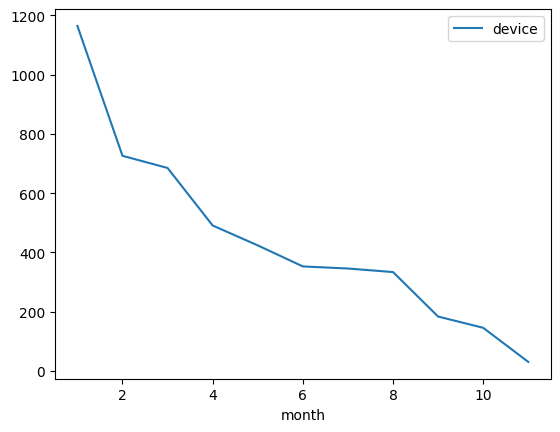

In [12]:
df.groupby('month').agg({'device':lambda x: x.nunique()}).plot()
plt.show()

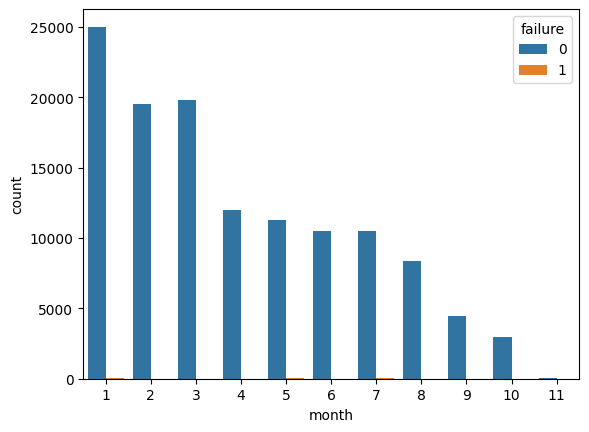

In [13]:
ax = sns.countplot(x='month', hue = 'failure', data=df)
plt.show()

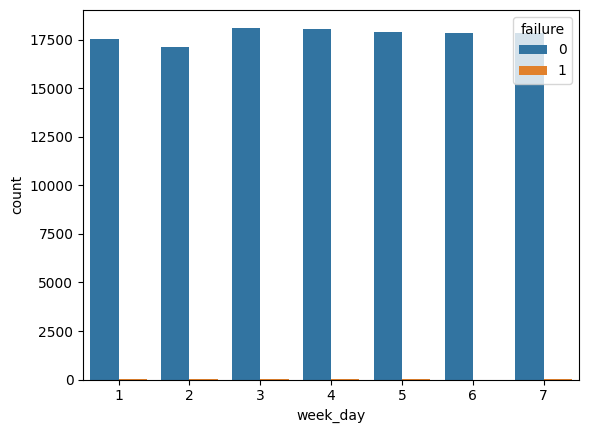

In [14]:
ax = sns.countplot(x='week_day',hue='failure',data=df)
plt.show()

In [17]:
max(df.date), min(df.date)

(Timestamp('2015-11-02 00:00:00'), Timestamp('2015-01-01 00:00:00'))

In [94]:
df_date = df.groupby('device').agg({'date':max})

df_date.date.to_dict()

df_failure = df.loc[df.failure==1,['device','date']]

df_good = df.loc[df.failure==0,['device','date']]

df_date.shape,df_failure.shape

df['max_date']=df.device.map(df_date.date.to_dict())

df

C:\Users\kapil\AppData\Local\Temp\ipykernel_9252\457550162.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_date = df.groupby('device').agg({'date':max})


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0 days,1,3,2015-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0,305 days,11,7,2015-11-02
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13,305 days,11,7,2015-11-02
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,305 days,11,7,2015-11-02
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,305 days,11,7,2015-11-02


In [22]:
new_df = df[(df.failure == 1) & (df.date!= df.max_date)]

new_df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
77958,2015-05-05,S1F136J0,1,131519808,0,0,25,16,343464,8,8,0,124 days,5,1,2015-05-06
79590,2015-05-09,W1F0KCP2,1,176861128,10392,0,121,6,310699,0,0,0,128 days,5,5,2015-05-11
79601,2015-05-09,W1F0M35B,1,141805096,0,0,1,7,267203,0,0,0,128 days,5,5,2015-05-11
101999,2015-07-12,S1F0GPFZ,1,236544080,0,0,0,9,264594,0,0,0,192 days,7,6,2015-07-24
104223,2015-07-18,W1F11ZG9,1,32671632,368,9,486,3,344433,0,0,1,198 days,7,5,2015-08-17


### Reduce dataset with Unique Device ID

In [23]:
df.metric1.nunique()

123877

In [24]:
df1 = df.groupby('device').agg({'date':max})
df1.shape

C:\Users\kapil\AppData\Local\Temp\ipykernel_9252\3930739644.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df1 = df.groupby('device').agg({'date':max})


(1169, 1)

In [26]:
df1 = df1.reset_index()
df = df.reset_index(drop=True)
df2 = pd.merge(df1, df, how = 'left', on = ['device', 'date'])

df2.shape

(1169, 16)

In [27]:
df2

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Z1F1VMZB,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7,2015-10-19
1165,Z1F1VQFY,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1,2015-06-30
1166,Z1F26YZB,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2,2015-03-25
1167,Z1F282ZV,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2,2015-03-25


#### Create feature called 'failure_before'

In [28]:
df2['failure_before']=0
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06,0
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11,0
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06,0
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17,0
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06,0


In [29]:
df2.loc[df2.device == 'S1F136J0','failure_before'] = 1
df2.loc[df2.device == 'W1F0KCP2','failure_before'] = 1
df2.loc[df2.device == 'W1F0M35B','failure_before'] = 1
df2.loc[df2.device == 'S1F0GPFZ','failure_before'] = 1
df2.loc[df2.device == 'W1F11ZG9','failure_before'] = 1

#### Redefine device ID Value


In [30]:
df2.device

0       S1F01085
1       S1F013BB
2       S1F0166B
3       S1F01E6Y
4       S1F01JE0
          ...   
1164    Z1F1VMZB
1165    Z1F1VQFY
1166    Z1F26YZB
1167    Z1F282ZV
1168    Z1F2PBHX
Name: device, Length: 1169, dtype: object

In [31]:
id = df2.device.values.tolist()

In [32]:
id1 = []
for i in id:
    i = i[:4]
    id1.append(i)
df2.device=id1
df2.device.value_counts()

device
S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: count, dtype: int64

In [33]:
dev= pd.crosstab(df2['device'],df2['failure'])


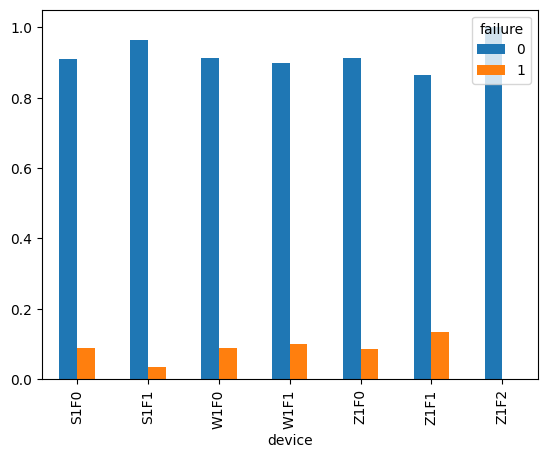

In [34]:
dev.div(dev.sum(1).astype(float), axis=0).plot(kind='bar')
plt.show()
                                               

### Data Transformation

##### As metric 3, 4, 5, 7, 9 are very small we shall convert this as a categorical data

In [36]:
cat_ftrs = ['metric3','metric4', 'metric5', 'metric7', 'metric9'] 
for col in cat_ftrs:
    df2[col]=df2[col].astype('object')

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   device          1169 non-null   object         
 1   date            1169 non-null   datetime64[ns] 
 2   failure         1169 non-null   int64          
 3   metric1         1169 non-null   int64          
 4   metric2         1169 non-null   int64          
 5   metric3         1169 non-null   object         
 6   metric4         1169 non-null   object         
 7   metric5         1169 non-null   object         
 8   metric6         1169 non-null   int64          
 9   metric7         1169 non-null   object         
 10  metric8         1169 non-null   int64          
 11  metric9         1169 non-null   object         
 12  activedays      1169 non-null   timedelta64[ns]
 13  month           1169 non-null   int32          
 14  week_day        1169 non-null   int32   

##### Now, Converting the activedays datatype to numerical datatype

In [38]:
def str_to_num(str):
    return str.split(' ')[0]

df2.activedays = df2.activedays.astype('str')

df2.activedays=df2.activedays.apply(str_to_num)
df2.activedays = df2.activedays.astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   int32         
 14  week_day        1169 non-null   int32         
 15  max_

##### Converting month and week_days in categorical data

In [39]:
for col in ['month','week_day']:
    df2[col]=df2[col].astype('object')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

### Data Standardization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_ftrs =['metric1','metric2','metric6'] 
df2[num_ftrs]=scaler.fit_transform(df2[num_ftrs])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   float64       
 4   metric2         1169 non-null   float64       
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   float64       
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

##### It is obvious that metric7 and metric8 is highly linear related or equal to each other

##### Thus, dropping metric8 column from the dataset



In [41]:
(df['metric7']==df['metric8']).value_counts()

True    124494
Name: count, dtype: int64

In [42]:
df.drop('metric8',axis=1,inplace=True)

In [43]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0 days,1,3,2015-08-24


In [44]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F0,2015-01-06,0,0.094795,-0.136309,0,52,6,1.333502,0,0,7,5,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,-0.092146,-0.145660,0,0,5,4.008798,0,0,0,130,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,-1.630184,-0.145660,3,0,6,1.289341,0,0,0,5,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,0.357937,-0.145660,0,0,12,-0.100105,0,0,0,47,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,0.898989,-0.145660,0,0,6,1.359772,0,0,0,5,1,1,2015-01-06,0


In [45]:
df2.drop(['date','max_date'],axis=1,inplace=True)

In [46]:
df2.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,failure_before
0,S1F0,0,0.094795,-0.136309,0,52,6,1.333502,0,0,7,5,1,1,0
1,S1F0,0,-0.092146,-0.145660,0,0,5,4.008798,0,0,0,130,5,7,0
2,S1F0,0,-1.630184,-0.145660,3,0,6,1.289341,0,0,0,5,1,1,0
3,S1F0,0,0.357937,-0.145660,0,0,12,-0.100105,0,0,0,47,2,1,0
4,S1F0,0,0.898989,-0.145660,0,0,6,1.359772,0,0,0,5,1,1,0


In [47]:
df2 = pd.get_dummies(df2,drop_first=True)

In [48]:
df2.head()

,failure,metric1,metric2,metric6,metric8,activedays,failure_before,device_S1F1,device_W1F0,device_W1F1,...,month_8,month_9,month_10,month_11,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,week_day_7
0,0,0.094795,-0.136309,1.333502,0,5,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,-0.092146,-0.145660,4.008798,0,130,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,-1.630184,-0.145660,1.289341,0,5,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0.357937,-0.145660,-0.100105,0,47,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0.898989,-0.145660,1.359772,0,5,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df2.shape

(1169, 279)

In [52]:
df2.failure.value_counts()

failure
0    1068
1     101
Name: count, dtype: int64

### Feature Selection

In [53]:
X = df2.drop('failure',axis=1)
y = df2.failure

In [54]:
X

,metric1,metric2,metric6,metric8,activedays,failure_before,device_S1F1,device_W1F0,device_W1F1,device_Z1F0,...,month_8,month_9,month_10,month_11,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,week_day_7
0,0.094795,-0.136309,1.333502,0,5,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.092146,-0.145660,4.008798,0,130,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-1.630184,-0.145660,1.289341,0,5,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.357937,-0.145660,-0.100105,0,47,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.898989,-0.145660,1.359772,0,5,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,-0.358265,-0.145660,-0.061700,0,291,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1165,0.794211,-0.145660,-0.044401,0,180,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1166,1.519129,-0.145660,0.211274,0,83,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1167,-0.702603,-0.145660,-0.736728,0,83,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [55]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1164    0
1165    1
1166    0
1167    0
1168    0
Name: failure, Length: 1169, dtype: int64

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
clf= clf.fit(X,y)

In [60]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf,prefit=True)
x_reduced = model.transform(X)
print (x_reduced.shape)

(1169, 56)


C:\Users\kapil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [61]:
x_reduced=pd.DataFrame(x_reduced)

In [62]:
x_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.094795,-0.136309,1.333502,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.092146,-0.145660,4.008798,0.0,130.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.630184,-0.145660,1.289341,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.357937,-0.145660,-0.100105,0.0,47.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.898989,-0.145660,1.359772,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [66]:
log = LogisticRegression(solver='newton-cg')

In [78]:
gd = GradientBoostingClassifier()

In [83]:
log.fit(x_train, y_train)

C:\Users\kapil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
predictions = log.predict(x_test)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy_score(y_test, predictions)

0.9273504273504274

In [86]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       218
           1       0.33      0.06      0.11        16

    accuracy                           0.93       234
   macro avg       0.63      0.53      0.53       234
weighted avg       0.89      0.93      0.90       234

[[216   2]
 [ 15   1]]


In [89]:
from sklearn import metrics
rm = RandomForestClassifier()
rm.fit(x_train, y_train)

y_pred = rm.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9401709401709402


In [91]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       218
           1       0.67      0.25      0.36        16

    accuracy                           0.94       234
   macro avg       0.81      0.62      0.67       234
weighted avg       0.93      0.94      0.93       234

[[216   2]
 [ 12   4]]


In [92]:
from sklearn import metrics
gd.fit(x_train, y_train)

y_pred = gd.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9529914529914529


In [93]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       218
           1       0.73      0.50      0.59        16

    accuracy                           0.95       234
   macro avg       0.85      0.74      0.78       234
weighted avg       0.95      0.95      0.95       234

[[215   3]
 [  8   8]]


#### After applying GradientBoostingClassifier we noticed that it is giving us an accuracy of 95.299% on our dataset.